< 신경망 학습 >
- 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 지표; 손실 함수

선형 분리 가능 문제는 데이터에 의한 자동 학습이 가능. (퍼셉트론 수렴 정리)
그러나 비선형 분리 문제는 불가.

이미지에서 특징을 추출하고, 그 특징의 패턴을 기계학습 기술로 학습.
- 특징 : 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기
- 이미지의 특징 - 벡터
    - 컴퓨터 비전 분야 : SIFT, SURF, HOG 등
- 변환된 벡터를 가지고 SVM, KNN 등으로 학습

- SIFT(Scale-Invariant Feature Transform) : 이미지의 로컬 특징을 감지, 설명 및 일치시키는 컴퓨터 비전 알고리즘
    - 이미지의 크기와 회전에 불변하는 특징을 추출

딥러닝 == 종단간 기계학습

- 범용 능력 : 훈련 데이터에 포함되지 않는 데이터로도 문제를 올바르게 풀어내는 능력
- 오버피팅(== 과적합, 과대적합, 과학습, 과적응 등) : 한 데이터셋에만 지나치게 최적화된 상태

손실 함수(== 비용 함수); 평균 제곱 오차, 교차 엔트로피 오차 등을 사용
- 평균 제곱 오차 : 출력값과 정답의 차를 제곱하여 모두 더한 후 반 나눔
- 교차 엔트로피 오차 : 정답일 때의 출력값에 자연 로그를 취하고 -1을 곱함
    - 출력값이 분수이므로 로그값에 -1을 곱해야 양수가 나옴

In [100]:
import numpy as np

In [101]:
# 3장에서 학습한 손글씨 판별, 첫 번째 원소부터 0, 1, 2, ...
# 출력층에서의 활성화 함수; 소프트맥스 함수
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 2일 확률이 제일 높음
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 원핫인코딩, 정답 2

In [102]:
def mean_squared_error(y, t): # 평균 제곱 오차
    return 0.5 * np.sum((y-t)**2)

In [103]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [104]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))
# 앞선 y보다 현재 y가 오차가 더 큼 -> 정답이 아닐 확률이 더 커짐

0.5975

C:\Users\jjyo0\AppData\Local\Temp\ipykernel_3164\2403301242.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x))


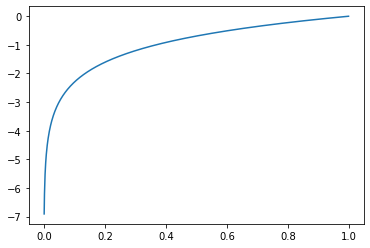

C:\Users\jjyo0\AppData\Local\Temp\ipykernel_3164\2403301242.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, -1 * np.log(x))


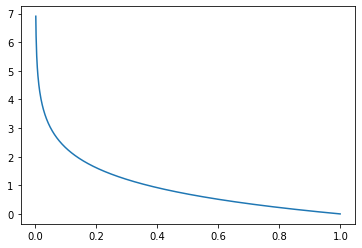

In [105]:
import numpy as np
from matplotlib import pyplot as plt


x = np.arange(0.0, 1.0, 0.001)  #x좌표 

plt.plot(x, np.log(x))
plt.show()

plt.plot(x, -1 * np.log(x))
plt.show()

In [106]:
def cross_entropy_error(y, t): # 매개변수는 모두 넘파이 배열
    delta = 1e-7 # 마이너스 무한대가 발생하지 않도록 아주 작은 값인 delta를 더해줌
    return -np.sum(t * np.log(y + delta))

In [107]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


평균 손실 함수
- 교차 엔트로피 오차는 1/N배 하여 정규화

많은 데이터를 모두 계산하는 것은 합리적이지 않으니 데이터 일부만 추출해 전체의 근사치로 이용할 수 있음. 여기에서의 데이터 일부가 미니배치임. 이를 이용한 학습법이 미니배치 학습.

In [108]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
    
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [109]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
# train_size 이하의 숫자 중 batch_size 개수만큼 랜덤픽
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [110]:
np.random.choice(60000, 10)

array([ 2026, 27173, 40691,  9724, 36203,  5009, 37158, 14625, 12152,
       30725])

In [111]:
def cross_entropy_error(y, t):
    print(t, y, y.shape[0])
    if y.ndim == 1: # ndim : 배열의 차원
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    # !!질문!! y.shape[0]이면 batch_size가 무조건 1이 되지 않나?
    # 데이터의 개수를 의미하므로 여기서는 1이 되는 듯
    return -np.sum(t * np.log(y)) / batch_size

In [112]:
def cross_entropy_error(y, t):
    print(t, y, y.shape[0])
    if y.ndim == 1: # ndim : 배열의 차원
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
    # !!질문!! 이거 대체 어케 계산되는 거임?(해결)
    # batch_size만큼 행을 만드는데, k번째 행에서 해당 t번째 열의 원소를 의미

정확도를 높이기 위해 손실 함수를 사용하는 이유 : 매개 변수를 미분한 것을 이용하여 최적의 값을 찾아 업데이트하기 때문.
- 미분값이 0일 때를 찾아야 함.

왜 정확도 그 자체를 지표로 사용하지 않을까?
- 정확도는 '(맞은 데이터 수)/(전체 데이터 수)'이기 때문에 불연속적인 값임.
- 그러나 손실 함수의 경우, 미묘한 변화에 받은 영향을 그대로 볼 수 있기 때문에 그 결과가 연속적인 값으로 나타남.

- 이러한 이유로 계단 함수를 활성화 함수로 사용하지 않음! 디테일한 학습이 불가하기 때문.
    - 계단 함수를 미분하면 0을 제외한 모든 곳에서 0임 => 매개변수 업데이트 불가

경사법
- 기울기 값 기준

In [113]:
def numerical_diff(f, x): # 수치 미분
    h = 10e-50 # 값이 너무 작아서 '반올림 오차' 문제를 일으킴
    # 적당히 좋은 값으로 10의 -4승이 있음
    return (f(x+h) - f(x)) / h
    # 해당 리턴 값은 '접선이 아닌' 점 (x+h)와 (x) 사이의 기울기를 구하는 것임. -> 전방 차분
    # 차분(: 임의 두 점에서의 함수 값들의 차이)이 존재
    # 오차가 있을 수 밖에 없음.

In [114]:
np.float32(1e-50)

0.0

중심 차분(== 중앙 차분)
- 수치 미분에서의 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산

In [115]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

수치 미분 vs 해석적 미분
- 수치 미분은 우리가 코드로 구현하는 것. 수학 시간에 배운 것을 근사치로 계산하는 방법.
- 해석적 미분은 수학 시간에 배운 것 그대로.

In [116]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

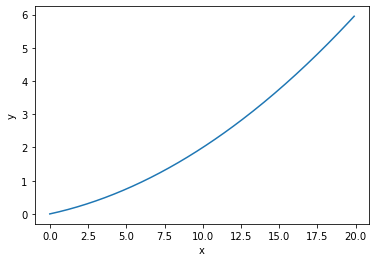

In [117]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [118]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [119]:
def function_2(x):
    return np.sum(x**2)
    return x[0]**2 + x[1]**2

In [120]:
def function_tmp1(x0): # 편미분 해야함
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [121]:
def function_tmp2(x1):
    return 3.0*2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

기울기 : 모든 변수의 편미분을 벡터로 정리한 것

In [122]:
def numerical_gradient(f, x): # 기울기
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 특정 배열(x)과 같은 크기(shape)의 0으로만 구성된 배열을 구함
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x + h)
        
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x - h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) # (f(x+h) - f(x-h)) / (2*h)
        x[idx] = tmp_val # x는 값 원상복구
        
    return grad

'''
0으로 초기화 된 x와 같은 사이즈의 배열을 만들고, 거기에 각각의 미분 값을 저장.
미분 값을 저장한 배열을 리턴
'''

'\n0으로 초기화 된 x와 같은 사이즈의 배열을 만들고, 거기에 각각의 미분 값을 저장.\n미분 값을 저장한 배열을 리턴\n'

In [123]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [124]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [125]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

위의 numerical_gradient() 함수는 각 점((3, 4), (0, 2), (3, 0)에서의 기울기를 구한 것인데, 이 기울기는 평면 상에서 벡터로 그려짐.
- 이 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향을 나타냄.
    - 감소하는 방향!

학습 중 최적의 매개변수를 찾아야 함. == 손실 함수가 최솟값이 될 때의 매개변수를 찾아야 함!
- 이때, 기울기를 이용해(기울기가 0인 지점을 탐색) 함수의 최솟값을 찾는 것 => 경사법
- 하지만 이 기울기는 '극솟값, 최솟값, 안장점'에서 0이기 때문에 해당 점이 반드시 최솟값이라는 보장은 할 수 없음.
- 또한, 학습이 진행되지 않는 고원에 빠질 수 있음.

경사 하강법 vs 경사 상승법
- 경사 하강법 : 기울기의 최솟값 탐색
- 경사 상승법 : 기울기의 최댓값 탐색
- -1을 곱해주면 서로(반대)가 됨

에타(eta) : 신경망 학습에서 학습률을 의미, 한 번 학습 시 매개변수를 갱신하는 양
- 학습률 값은 미리 특정 값으로 지정해야 함.

In [126]:
# f : 최적화하려는 함수
# init_x : 초깃값
# lr == learning rate : 학습률
# step_num : 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x # 초기화
    
    for i in range(step_num): # 100번 반복
        grad = numerical_gradient(f, x) # 미분값을 grad에 할당
        x -= lr * grad # x = x - lr(학습률) * grad(미분값)
    return x

In [127]:
def function_2(x):
    return np.sum(x**2)

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
# 학습률 0.1, 초깃값은 init_x이며 100회 반복하여 function_2를 최적화 함

array([-6.11110793e-10,  8.14814391e-10])

In [128]:
# 학습률이 너무 클 때 -> 너무 큰 값으로 발산
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [129]:
# 학습률이 너무 작을 때 -> 거의 갱신되지 않음
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

하이퍼파라미터(Hyper parameter, 초매개변수) : 사람이 직접 설정해야 하는 매개변수
- EX) 학습률
- 가중치와 편향은 훈련 데이터와 학습 알고리즘에 의해 자동으로 획득되므로 하이퍼파라미터가 아님

신경망 학습에서 가중치 매개변수에 대한 손실 함수의 기울기 구하기
- 편미분 배열의 형상(행렬)이 가중치 행렬과 같아야 함

In [131]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 표준정규분포로부터 샘플링된 난수를 반환하는 함수
        
    def predict(self, x): # 예측 수행
        return np.dot(x, self.W) # x와 self.W을 행렬곱
    
    def loss(self, x, t): # 손실 함수, x: 입력 데이터, t: 정답 레이블
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [ ]:
'''
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
    
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

'''

In [134]:
net = simpleNet()
print(net.W) # 가중치 매개변수(2, 3)

x = np.array([0.6, 0.9]) # 입력 데이터
p = net.predict(x) # 분류
print(p)

np.argmax(p) # 최댓값의 인덱스

[[-0.33447707  0.20622332  0.34433655]
 [ 0.72350663  0.34102068  1.47549123]]
[0.45046972 0.43065261 1.53454403]


2

In [135]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.5126994863139301

In [136]:
def f(W): # W: 더미 변수(가변수(독립변수를 0과1로 변환한 변수)와 같은 의미인 듯)
    return net.loss(x, t) # 손실 함수 값 리턴

dW = numerical_gradient(f, net.W) # 가중치의 기울기
print(dW)

[[ 0.12152932  0.11914466 -0.24067398]
 [ 0.18229397  0.17871699 -0.36101097]]


In [2]:
# 간단한 함수를 람다 기법으로 표현하기
# 람다 형식 => lambda 매개변수 : 표현식
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

NameError: name 'net' is not defined

신경망 학습(매개변수(가중치, 편향)를 훈련 데이터에 적응하도록 조정하는 과정)의 절차 - 경사 하강법(확률적 경사 하강법, SGD(Stochastic Gradient Descent))
1. 미니배치; 일부 무작위 데이터 선별 -> 목표: 손실 함수의 최솟값 탐색
2. 기울기 산출; 손실 함수의 값을 작게 하는 방향을 찾아 가중치 매개변수의 기울기를 구함
3. 매개변수 갱신; 가중치 매개변수를 기울기 방향으로 약간 갱신
4. 1~3번 반복

In [1]:
# 2층 신경망(은닉층 1개)을 하나의 클래스로 구현
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    # input_size/hidden_size/output_size: 입력층/은닉층/출력층의 뉴런 수
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        self.params = {} # 딕셔너리 변수, 신경망 매개변수 보관
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size) # 정규 분포를 따르는 난수
        self.params['b1'] = np.zeros(hidden_size) # 편향 : 0
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size) # 편향 : 0
        
    def predict(self, x): # 분류
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t): # 손실 함수
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t) # 함수
        
        grads = {} # 딕셔너리 변수, 매개변수의 기울기 보관
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [3]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [4]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장)
y = net.predict

In [5]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

# 3분이나 걸렸다
# 뒷장에서 오차역전파법을 사용하는 효율 좋은 함수 gradient(self, x, t)을 배움

(784, 100)
(100,)
(100, 10)
(10,)


In [6]:
print(grads['W1'])
print(grads['b1'])
print(grads['W2'])
print(grads['b2'])

[[ 1.86719320e-04 -3.54458098e-04  1.27934463e-04 ... -2.06209008e-04
  -1.24964257e-04  1.72569106e-04]
 [ 5.79385229e-05 -1.53765896e-04  1.64866669e-04 ... -2.64773587e-04
  -4.29415836e-05  6.36640762e-05]
 [ 9.07027564e-05 -1.30062785e-04  6.06502604e-05 ... -2.66081992e-04
  -2.69605500e-04  7.06989267e-05]
 ...
 [ 1.25161401e-04 -1.84393887e-04  4.33149605e-05 ... -1.90114888e-04
  -1.59343201e-04 -1.65786407e-05]
 [ 9.39811273e-05 -2.39341564e-04  3.12607629e-05 ... -1.26881956e-04
  -2.59931476e-05  2.66524913e-05]
 [ 8.51819570e-05 -1.44095438e-04  3.15001647e-05 ... -9.74652292e-05
  -1.43529419e-04  1.30050524e-04]]
[ 2.19118592e-04 -4.61898619e-04  1.02590445e-04  1.73721268e-04
 -4.43234782e-06  1.40843905e-04  2.61730271e-04  3.54191565e-05
 -3.73766440e-04  2.68625655e-04  9.44050549e-05 -6.89157043e-05
 -5.14541698e-05 -4.24830371e-05  4.64905159e-05 -2.86985351e-04
  6.28148067e-05  4.96115025e-04  3.40045325e-06  1.47092942e-04
  2.96020297e-04  3.95481670e-05  1.574

In [11]:
# 미니배치 학습 구현
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
    
train_loss_list = []

# 하이퍼파라미터(직접 설정)
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 # 학습률
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key] # 학습률*미분값
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

학습 시 오버피팅을 일으키지 않는지 확인해야 함
- 정기적(1에폭별)으로 훈련 데이터와 시험 데이터에 대한 정확도를 기록해보자.

* 에폭(epoch) : 학습에서 훈련 데이터를 모두 소진했을 때의 횟수
    - EX) 10,000개의 데이터를 100개의 미니배치로 학습할 경우, 100회 반복해야 데이터를 모두 소진함. 이 경우, 1에폭 = 100회

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=Tre)
    
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # 너무 오래 걸려서 성능 개선된 gradient() 이용
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key] # 학습률*미분값
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

----------------------------------------------------------------------

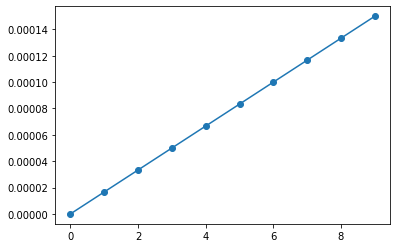

In [138]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 1)
y = x/60000

plt.plot(x, y)
plt.scatter(x, y)
plt.show()